# Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import math
import matplotlib.pylab as pyl
import pickle
import swifter
import warnings
import plotly.express as px
from itertools import chain
import scipy.stats as sps

warnings.filterwarnings('ignore')

C:\Users\Anuj\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#pd.set_option('max_colwidth', 999)
pd.set_option('display.max_columns', 1000)
pd.set_option("display.max_rows", 3000)
warnings.filterwarnings('ignore')

# Data 

**For reference-**

**RRRL stands for a defence line up with preferred feet of the order (from right back to left back): right footed - right footed - right footed - left footed**

**RRLL stands for a defence line up with preferred feet of the order (from right back to left back): right footed - right footed - left footed - left footed**

In [6]:
rrrl = pd.read_pickle('../data/clusters/clusters_v3/cluster_rrrl.pkl')
rrrl.reset_index(drop=True, inplace=True)
rrrl.head()

wyId       team                                       team_defense  \
0  2500089    Burnley  [MatthewLowton, KevinLong, JamesTarkowski, Ste...   
1  2500097  Leicester  [DannySimpson, WesMorgan, HarryMaguire, Christ...   
2  2500096      Stoke  [MoritzBauer, RyanShawcross, KurtZouma, ErikPi...   
3  2500093    Watford  [DarylJanmaat, CraigCathcart, ChristianKabasel...   
4  2500092   Brighton  [EzequielSchelotto, ShaneDuffy, LewisDunk, Gae...   

                  RB           R-CB               L-CB              LB  RCB  \
0      MatthewLowton      KevinLong     JamesTarkowski     StephenWard  NaN   
1       DannySimpson      WesMorgan       HarryMaguire  ChristianFuchs  NaN   
2        MoritzBauer  RyanShawcross          KurtZouma     ErikPieters  NaN   
3       DarylJanmaat  CraigCathcart  ChristianKabasele     JoseHolebas  NaN   
4  EzequielSchelotto     ShaneDuffy          LewisDunk      GaetanBong  NaN   

    CB  LCB  RWB  LWB  backline                match  gameweek  \
0  NaN  NaN  NaN  NaN         4  Burnley-Bournemouth        38   
1  NaN  NaN  NaN  NaN         4      Spurs-Leicester        38   
2  NaN  NaN  NaN  NaN         4        Swansea-Stoke        38   
3  NaN  NaN  NaN  NaN         4      Man Utd-Watford        38   
4  NaN  NaN  NaN  NaN         4   Liverpool-Brighton        38   

                                           teamsData              dateutc  \
0  {'1646': {'scoreET': 0, 'coachId': 8880, 'side...  2018-05-13 14:00:00   
1  {'1631': {'scoreET': 0, 'coachId': 209010, 'si...  2018-05-13 14:00:00   
2  {'10531': {'scoreET': 0, 'coachId': 32573, 'si...  2018-05-13 14:00:00   
3  {'1644': {'scoreET': 0, 'coachId': 93112, 'sid...  2018-05-13 14:00:00   
4  {'1651': {'scoreET': 0, 'coachId': 8093, 'side...  2018-05-13 14:00:00   

             venue                                           referees  score  \
0        Turf Moor  [{'refereeId': 385705, 'role': 'referee'}, {'r...  1 - 2   
1  Wembley Stadium  [{'refereeId': 378951, 'role': 'referee'}, {'r...  5 - 4   
2  Liberty Stadium  [{'refereeId': 378952, 'role': 'referee'}, {'r...  1 - 2   
3     Old Trafford  [{'refereeId': 381853, 'role': 'referee'}, {'r...  1 - 0   
4          Anfield  [{'refereeId': 385704, 'role': 'referee'}, {'r...  4 - 0   

               footedness  RB_pass  RB_accpass  RB_highpass  RB_acchighpass  \
0  right-right-right-left       33          24            3               2   
1  right-right-right-left       14           7            5               2   
2  right-right-right-left       17          15            1               1   
3  right-right-right-left       37          34            4               3   
4  right-right-right-left       28          22            4               1   

                                       RB_accpassloc  \
0  [[[33.28, 11.56], [20.8, 23.8]], [[12.48, 9.52...   
1  [[[33.28, 6.8], [11.44, 26.52]], [[17.68, 14.9...   
2  [[[81.12, 11.56], [68.64, 29.92]], [[13.52, 22...   
3  [[[59.28, 1.36], [38.48, 16.32]], [[64.48, 2.0...   
4  [[[60.32, 8.84], [61.36, 6.12]], [[35.36, 17.0...   

                                     RB_inaccpassloc  \
0  [[[67.6, 6.8], [76.96, 0.0]], [[63.44, 7.48], ...   
1  [[[23.92, 3.4], [73.84, 34.68]], [[33.28, 1.36...   
2  [[[72.8, 2.72], [70.72, 5.44]], [[38.48, 20.4]...   
3  [[[71.76, 11.56], [74.88, 10.88]], [[81.12, 11...   
4  [[[46.8, 8.16], [58.24, 3.4]], [[16.64, 4.08],...   

                                   RB_acchighpassloc  \
0  [[[38.48, 5.44], [62.4, 10.2]], [[49.92, 14.28...   
1  [[[16.64, 11.56], [38.48, 1.36]], [[15.6, 13.6...   
2                     [[[5.2, 14.28], [40.56, 6.8]]]   
3  [[[64.48, 2.04], [91.52, 21.08]], [[28.08, 2.0...   
4                    [[[36.4, 8.84], [76.96, 2.04]]]   

                                 RB_inacchighpassloc  R_CB_pass  R_CB_accpass  \
0                   [[[30.16, 4.76], [93.6, 19.04]]]         45            39   
1  [[[23.92, 3.4], [73.84, 34.68]], [[55.12, 1.36...         13            11   
2   

In [7]:
rrll = pd.read_pickle('../data/clusters/clusters_v3/cluster_rrll.pkl')
rrll.reset_index(drop=True, inplace=True)
rrll.head()

wyId            team                                       team_defense  \
0  2500090  Crystal Palace  [AaronWanBissaka, JamesTomkins, MamadouSakho, ...   
1  2500095        Man City  [Danilo, JohnStones, AymericLaporte, FabianDelph]   
2  2500086  Crystal Palace  [JoelWard, JamesTomkins, MamadouSakho, Patrick...   
3  2500072           Stoke  [KurtZouma, RyanShawcross, BrunoMartinsIndi, E...   
4  2500070  Crystal Palace  [JoelWard, JamesTomkins, MamadouSakho, Patrick...   

                RB           R-CB              L-CB                 LB  RCB  \
0  AaronWanBissaka   JamesTomkins      MamadouSakho  PatrickvanAanholt  NaN   
1           Danilo     JohnStones    AymericLaporte        FabianDelph  NaN   
2         JoelWard   JamesTomkins      MamadouSakho  PatrickvanAanholt  NaN   
3        KurtZouma  RyanShawcross  BrunoMartinsIndi        ErikPieters  NaN   
4         JoelWard   JamesTomkins      MamadouSakho  PatrickvanAanholt  NaN   

    CB  LCB  RWB  LWB  backline                     match  gameweek  \
0  NaN  NaN  NaN  NaN         4  Crystal Palace-West Brom        38   
1  NaN  NaN  NaN  NaN         4      Southampton-Man City        38   
2  NaN  NaN  NaN  NaN         4      Stoke-Crystal Palace        37   
3  NaN  NaN  NaN  NaN         4           Liverpool-Stoke        36   
4  NaN  NaN  NaN  NaN         4  Crystal Palace-Leicester        36   

                                           teamsData              dateutc  \
0  {'1628': {'scoreET': 0, 'coachId': 8357, 'side...  2018-05-13 14:00:00   
1  {'1625': {'scoreET': 0, 'coachId': 267136, 'si...  2018-05-13 14:00:00   
2  {'1639': {'scoreET': 0, 'coachId': 8329, 'side...  2018-05-05 11:30:00   
3  {'1639': {'scoreET': 0, 'coachId': 0, 'side': ...  2018-04-28 11:30:00   
4  {'1631': {'scoreET': 0, 'coachId': 209010, 'si...  2018-04-28 14:00:00   

                venue                                           referees  \
0       Selhurst Park  [{'refereeId': 381851, 'role': 'referee'}, {'r...   
1  St. Mary's Stadium  [{'refereeId': 385911, 'role': 'referee'}, {'r...   
2      Bet365 Stadium  [{'refereeId': 384888, 'role': 'referee'}, {'r...   
3             Anfield  [{'refereeId': 385911, 'role': 'referee'}, {'r...   
4       Selhurst Park  [{'refereeId': 385909, 'role': 'referee'}, {'r...   

   score             footedness  RB_pass  RB_accpass  RB_highpass  \
0  2 - 0  right-right-left-left       56          53            1   
1  0 - 1  right-right-left-left       73          70            2   
2  1 - 2  right-right-left-left       13          11            2   
3  0 - 0  right-right-left-left       14           8            6   
4  5 - 0  right-right-left-left       31          27            2   

   RB_acchighpass                                      RB_accpassloc  \
0               1  [[[60.32, 11.56], [70.72, 8.84]], [[55.12, 11....   
1               1  [[[59.28, 4.08], [68.64, 26.52]], [[58.24, 9.5...   
2               1  [[[53.04, 34.0], [75.92, 34.68]], [[58.24, 2.7...   
3               2  [[[17.68, 11.56], [34.32, 17.0]], [[17.68, 6.1...   
4               2  [[[31.2, 17.68], [57.2, 6.12]], [[26.0, 6.8], ...   

                                     RB_inaccpassloc  \
0  [[[86.32, 22.44], [87.36, 25.84]], [[17.68, 3....   
1  [[[38.48, 10.88], [40.56, 6.8]], [[57.2, 43.52...   
2  [[[59.28, 2.72], [104.0, 2.72]], [[28.08, 2.72...   
3  [[[47.84, 6.12], [71.76, 0.0]], [[34.32, 8.16]...   
4  [[[34.32, 6.8], [69.68, 22.44]], [[52.0, 4.08]...   

                                   RB_acchighpassloc  \
0                   [[[24.96, 6.8], [45.76, 15.64]]]   
1                   [[[65.52, 8.84], [85.28, 4.76]]]   
2                   [[[78.0, 2.72], [87.36, 46.92]]]   
3  [[[17.68, 6.12], [63.44, 13.6]], [[28.08, 63.2...   
4  [[[37.44, 8.84], [75.92, 6.8]], [[28.08, 4.08]...   

                                 RB_inacchighpassloc  R_CB_pass  R_CB_accpass  \
0                                                 []         42            38   
1            

# Functions 

## Plot a Football Pitch

{x:[0,104]; y:[0,68]}

In [8]:
def draw_pitch(line, orientation,view):
    
    orientation = orientation
    view = view
    line = line
    
    if orientation.lower().startswith("h"):
        
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
    
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
        circle4 = plt.Circle((93, 34), 0.2,ls='solid',lw=1.5,color=line, fill=False, alpha=1)
        circle5 = plt.Circle((11, 34), 0.2,ls='solid',lw=1.5,color=line, fill=False, alpha=1)
        circle6 = plt.Circle((52, 34), 0.2,ls='solid',lw=1.5,color=line, fill=False, alpha=1)

        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-', color="None", zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-', color='None', zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color="None", zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        ax.add_artist(circle4)
        ax.add_artist(circle5)
        ax.add_artist(circle6)
        
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks

        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)

        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)


        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        
        
    return fig, ax

(<Figure size 748.8x489.6 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25f391c6198>)

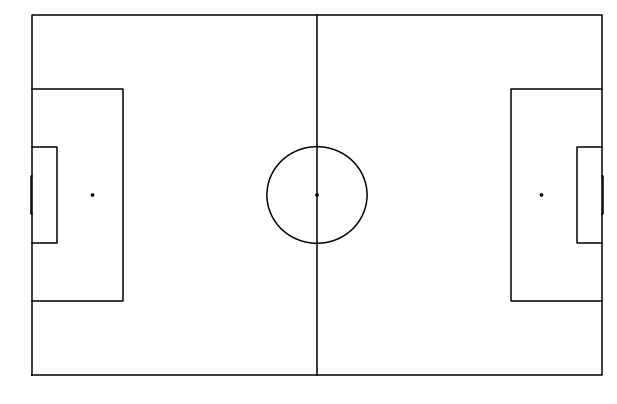

In [112]:
draw_pitch("#000000","h","full")

## Plot Event Data points on the Pitch 

In [9]:
def plot_points(x,y,c):
    draw_pitch("#faf0e6","h","full")
    plt.scatter(x,y,marker='o',color=c,edgecolors="black", zorder=12)
    plt.show()

## Get (x,y) coordinates from DataFrame 

In [10]:
def get_xy(df, col, n, m): #n - no of row entries
    # m = 0: Initial Position
    # m = 1: Final Position
    x=list()
    y=list()
    for i in range(0,n):
        for j in range(0, len(df[col][i])):
            for k in range(0,2):
                x.append(df[col][i][j][k][0])
                y.append(df[col][i][j][k][1])
    x = [x[i] for i in range(0+m, len(x), 2)]
    y = [y[i] for i in range(0+m, len(y), 2)]
    return x, y

## Plot Event Data Heatmap on Pitch 

In [11]:
def heatmap(x, y, title, c):
    fig, ax = draw_pitch("#000000","h","full")
    sns.kdeplot(x, y, cmap = c, shade = True)
    plt.title(title, fontsize = 30)
    plt.xlim(-1,105)
    plt.ylim(-1,69)
    plt.axis('off')
    plt.show()

## Compute and generate KDE of Pass Distances 

In [12]:
def compute_dist_pdf(df, col):
    dist=list()
    for j in range(0, len(df)):
        d = [np.subtract(i[1], i[0]) for i in df[col][j]]
        d = [list(np.square(i)) for i in d]
        d = [(i[0]+i[1])**(0.5) for i in d]
        dist.append(d)
    sns.set(color_codes=True)
    sns.kdeplot(list(itertools.chain(*dist)), shade=True)
    return dist

## Coordinates of Long Passes 

Long Pass - Pass distance >= 35 meters

In [13]:
def dist_threshold(df, col, n, m):
    x=list()
    y=list()
    x1=list()
    y1=list()
    for i in range(0,n):
        for j in range(0, len(df[col][i])):
            for k in range(0,2):
                x.append(df[col][i][j][k][0])
                y.append(df[col][i][j][k][1])
                
    for i in range(0, len(x), 2):
        dist = ((x[i] - x[i+1])**2 + (y[i] - y[i+1])**2)**(0.5)
        if (dist >= 35):
            x1.append(x[i])
            x1.append(x[i+1])
            y1.append(y[i])
            y1.append(y[i+1])
        else:
            continue
    
    x1 = [x1[i] for i in range(0+m, len(x1), 2)]
    y1 = [y1[i] for i in range(0+m, len(y1), 2)]
    
    return x1,y1

## Get total passes in each region of the pitch 

In [14]:
def get_region(x, y):

    x_rightflank_attack = [
        x[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] <= 17)
    ]
    y_rightflank_attack = [
        y[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] <= 17)
    ]
    x_rightflank_def = [
        x[i] for i in range(len(x)) if (x[i] < 52) and (y[i] <= 17)
    ]
    y_rightflank_def = [
        y[i] for i in range(len(x)) if (x[i] < 52) and (y[i] <= 17)
    ]

    x_leftflank_attack = [
        x[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] > 51)
    ]
    y_leftflank_attack = [
        y[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] > 51)
    ]
    x_leftflank_def = [
        x[i] for i in range(len(x)) if (x[i] < 52) and (y[i] > 51)
    ]
    y_leftflank_def = [
        y[i] for i in range(len(x)) if (x[i] < 52) and (y[i] > 51)
    ]

    x_rightcentral_attack = [
        x[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 17) and (y[i] <= 34)
    ]
    y_rightcentral_attack = [
        y[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 17) and (y[i] <= 34)
    ]
    x_rightcentral_def = [
        x[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 17) and (y[i] <= 34)
    ]
    y_rightcentral_def = [
        y[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 17) and (y[i] <= 34)
    ]

    x_leftcentral_attack = [
        x[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 34) and (y[i] <= 51)
    ]
    y_leftcentral_attack = [
        y[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 34) and (y[i] <= 51)
    ]
    x_leftcentral_def = [
        x[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 34) and (y[i] <= 51)
    ]
    y_leftcentral_def = [
        y[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 34) and (y[i] <= 51)
    ]

    return [len(x_rightflank_attack), len(x_rightflank_def), len(
        x_leftflank_attack), len(x_leftflank_def), len(
            x_rightcentral_attack), len(x_rightcentral_def), len(
                x_leftcentral_attack), len(x_leftcentral_def)]

In [24]:
def est_dense_reg(a, b, p):
    df_kde = pd.DataFrame(columns=['x', 'y'])
    df_kde['x'] = a
    df_kde['y'] = b
    kde = sps.gaussian_kde(df_kde.values.T)
    xx, yy = np.meshgrid(
    np.linspace(0, 104, 500),
    np.linspace(0, 68, 500))
    z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)
    zi = z > np.max(z) * (p/10)
    x1 = [min(xx[zi]), max(xx[zi])]
    y1 = [min(yy[zi]), max(yy[zi])]
    return x1, y1

# Analysis & Viz 

**Convention:** Initial Locations denoted by (a,b) &
Final Locations denoted by (x,y)

##  'RRRL'  - Right Footed LCB

### Accurate Passes

In [15]:
a,b = get_xy(rrrl, 'L_CB_accpassloc', len(rrrl), 0) #Pass Initial Location

In [16]:
x,y = get_xy(rrrl, 'L_CB_accpassloc', len(rrrl), 1) #Pass Final Location

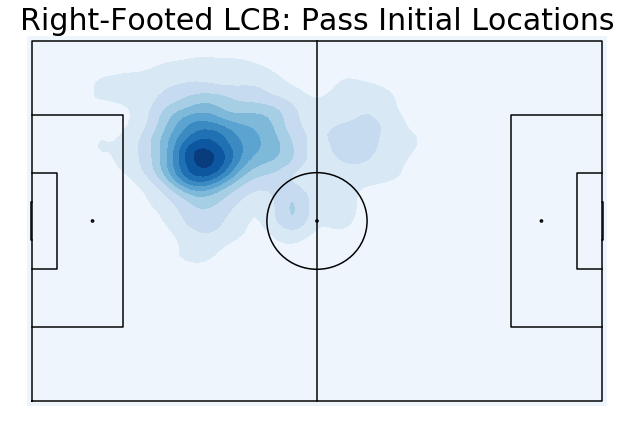

In [17]:
heatmap(a,b, 'Right-Footed LCB: Pass Initial Locations', 'Blues')

In [18]:
a,b = get_xy(rrrl, 'L_CB_acchighpassloc', len(rrrl), 0) #Aerial Pass Initial Location

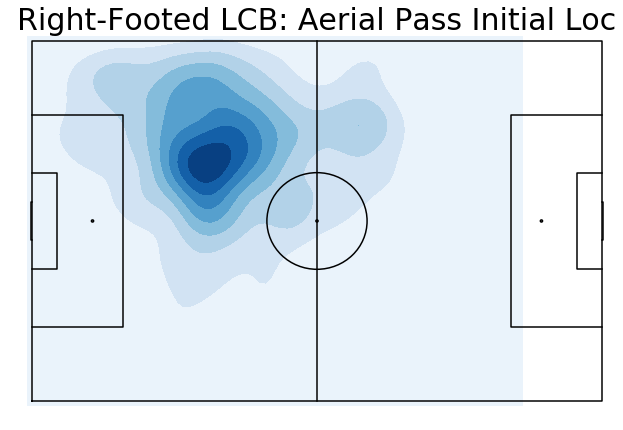

In [20]:
heatmap(a, b, 'Right-Footed LCB: Aerial Pass Initial Loc', 'Blues')

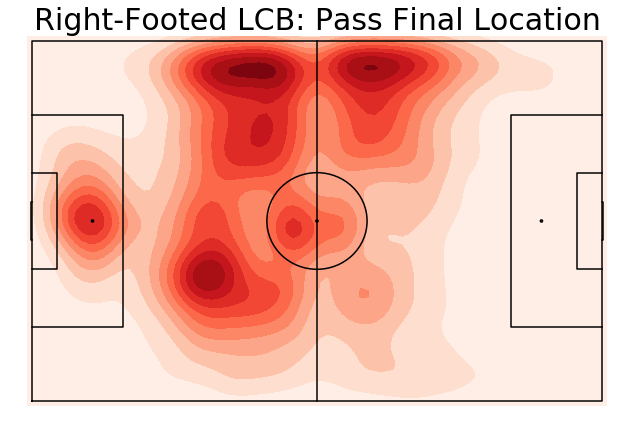

In [21]:
heatmap(x,y, 'Right-Footed LCB: Pass Final Location', 'Reds')

In [22]:
x,y = get_xy(rrrl, 'L_CB_acchighpassloc', len(rrrl), 1)

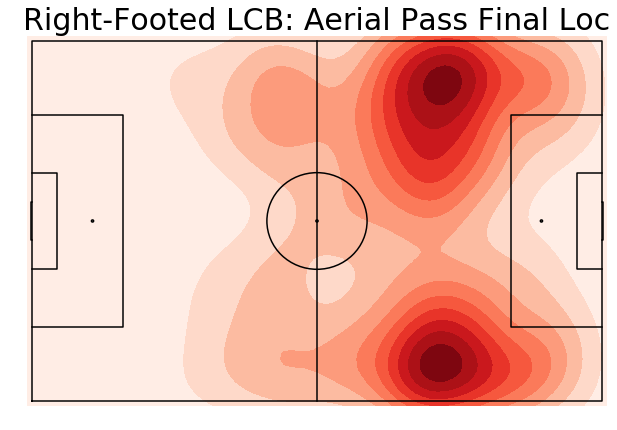

In [23]:
heatmap(x, y, 'Right-Footed LCB: Aerial Pass Final Loc', 'Reds')

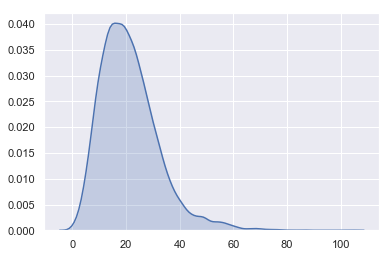

In [141]:
dist = compute_dist_pdf(rrrl, 'L_CB_accpassloc')

In [154]:
(rrrl['L_CB_accpass'].sum()/rrrl['L_CB_pass'].sum())*100

88.41069119126311

### Inaccurate 

In [172]:
a,b = get_xy(rrrl, 'L_CB_inaccpassloc', len(rrrl), 0)

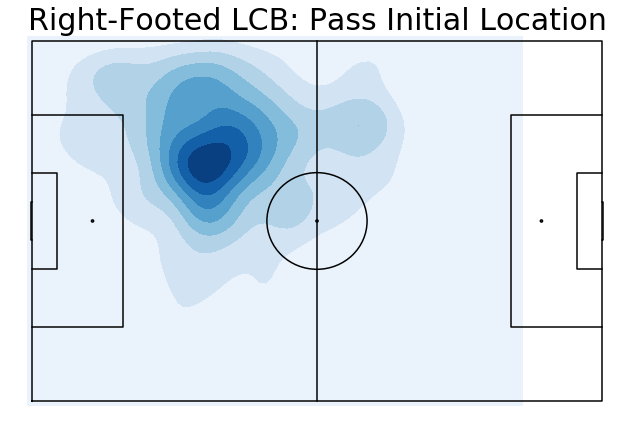

In [24]:
heatmap(a,b, 'Right-Footed LCB: Pass Initial Location', 'Blues')

In [26]:
x,y = get_xy(rrrl, 'L_CB_inaccpassloc', len(rrrl), 1)

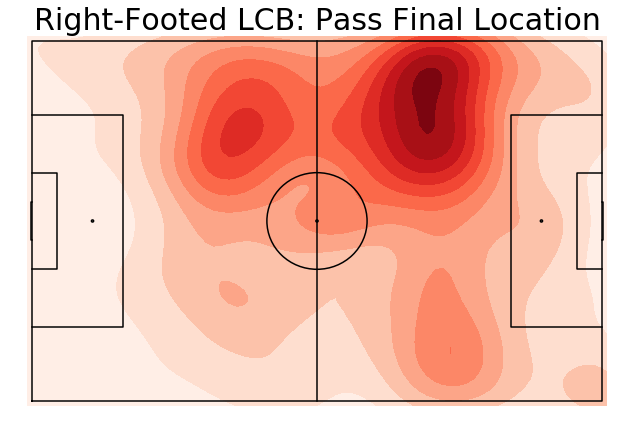

In [27]:
heatmap(x,y, 'Right-Footed LCB: Pass Final Location', 'Reds')

## 'RRLL' - Left Footed LCB

### Accurate 

In [28]:
a,b = get_xy(rrll, 'L_CB_accpassloc', len(rrll), 0)

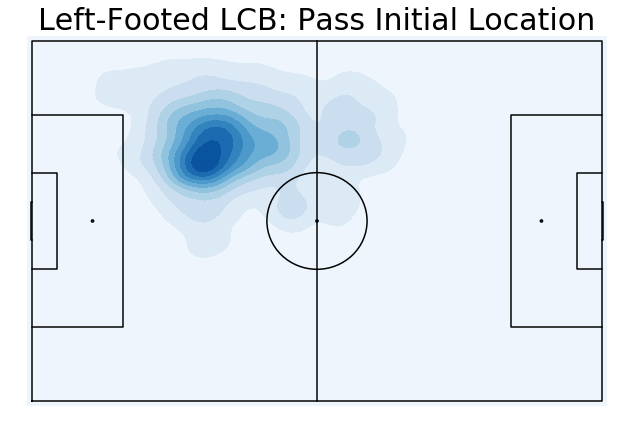

In [29]:
heatmap(a,b, 'Left-Footed LCB: Pass Initial Location', 'Blues')

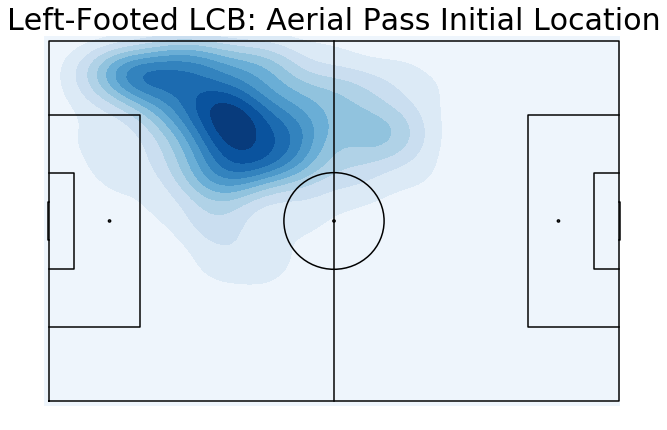

In [30]:
a,b = get_xy(rrll, 'L_CB_acchighpassloc', len(rrll), 0)
heatmap(a, b, 'Left-Footed LCB: Aerial Pass Initial Location', 'Blues')

In [31]:
x1,y1 = get_xy(rrll, 'L_CB_accpassloc', len(rrll), 1)

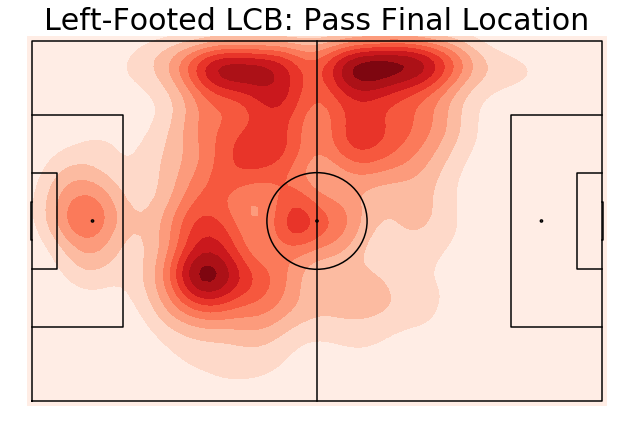

In [32]:
heatmap(x1,y1, 'Left-Footed LCB: Pass Final Location', 'Reds')

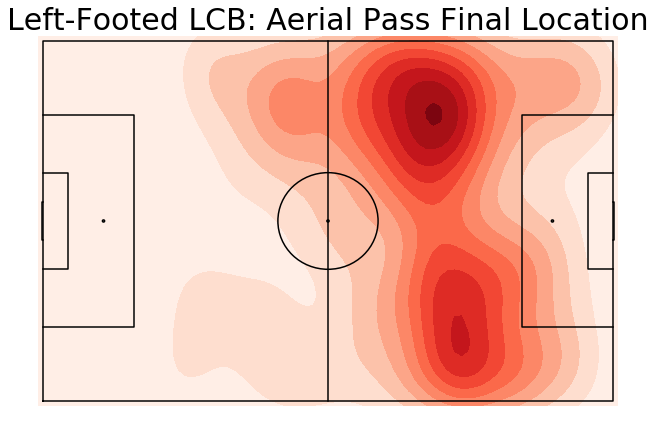

In [33]:
x,y = get_xy(rrll, 'L_CB_acchighpassloc', len(rrll), 1)
heatmap(x, y, 'Left-Footed LCB: Aerial Pass Final Location', 'Reds')

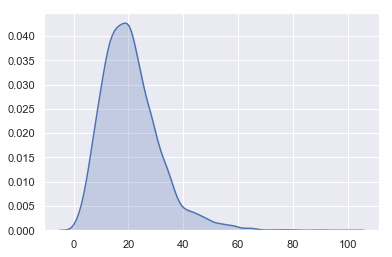

In [145]:
dist1 = compute_dist_pdf(rrll, 'L_CB_accpassloc')

In [155]:
(rrll['L_CB_accpass'].sum()/rrll['L_CB_pass'].sum())*100

89.46219997432937

In [147]:
rrll['L-CB'].value_counts()

BenMee              29
JanVertonghen       24
WesleyHoedt         19
MamadouSakho        16
RagnarKlavan        14
NathanAk            11
BrunoMartinsIndi    10
NathanAke            9
AymericLaporte       8
AngeloOgbonna        6
CiaranClark          5
KevinWimmer          4
MiguelBritos         4
MarcosRojo           3
EliaquimMangala      2
Name: L-CB, dtype: int64

### Inaccurate 

In [35]:
a,b = get_xy(rrll, 'L_CB_inaccpassloc', len(rrll), 0)

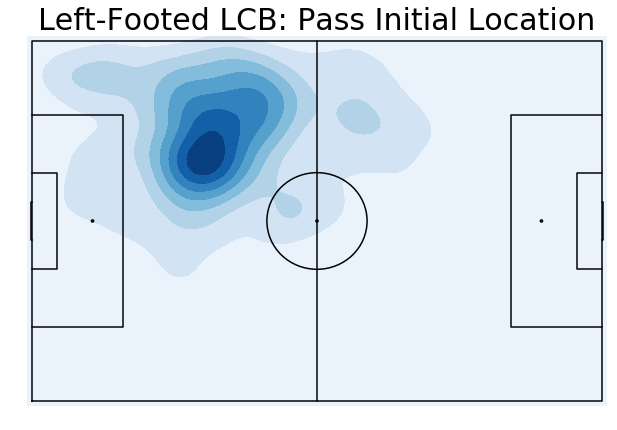

In [36]:
heatmap(a,b, 'Left-Footed LCB: Pass Initial Location', 'Blues')

In [37]:
x1,y1 = get_xy(rrll, 'L_CB_inaccpassloc', len(rrll), 1)

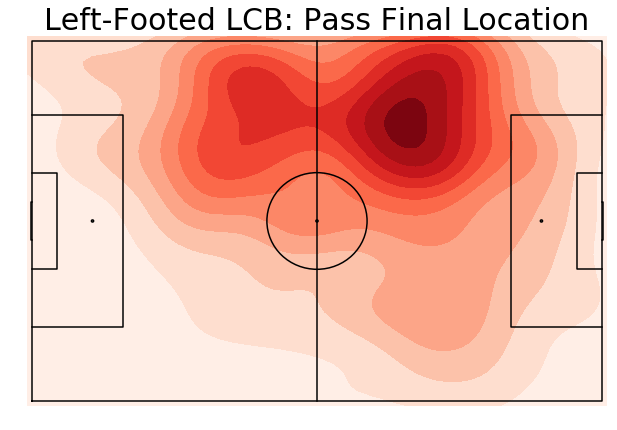

In [38]:
heatmap(x1,y1, 'Left-Footed LCB: Pass Final Location', 'Reds')

## 'RRRLL' 

In [150]:
x2,y2 = get_xy(rrrll, 'LCB_accpassloc', len(rrrll), 1)

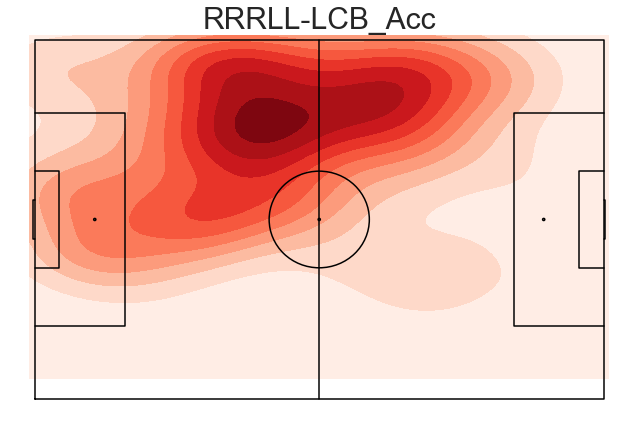

In [151]:
heatmap(x2,y2, 'RRRLL-LCB_Acc')

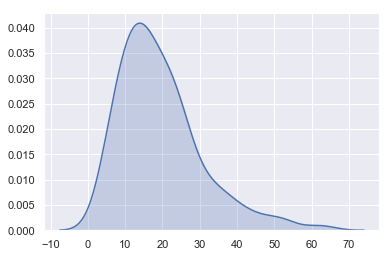

In [152]:
dist2 = compute_dist_pdf(rrrll, 'LCB_accpassloc')

In [153]:
rrrll['LCB'].value_counts()

TerenceKongolo    4
WesleyHoedt       2
NathanAke         1
CiaranClark       1
Name: LCB, dtype: int64

## Laporte 

### Accurate 

In [181]:
df = rrll[rrll['L-CB']=='AymericLaporte']
df.reset_index(drop=True, inplace=True)

In [182]:
a,b = get_xy(df, 'L_CB_accpassloc', len(df), 0)

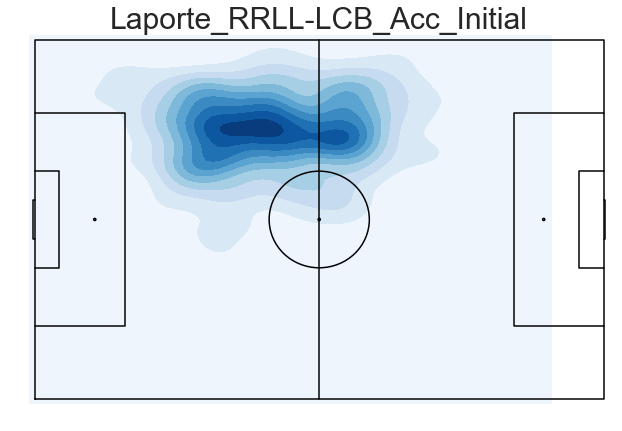

In [183]:
heatmap(a,b, 'Laporte_RRLL-LCB_Acc_Initial', 'Blues')

In [184]:
x1,y1 = get_xy(df, 'L_CB_accpassloc', len(df), 1)

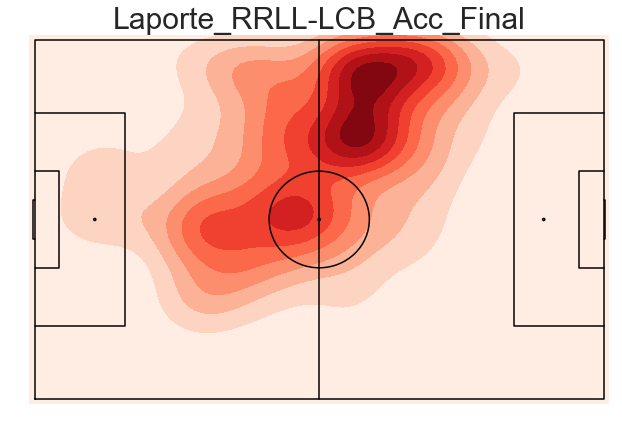

In [185]:
heatmap(x1,y1, 'Laporte_RRLL-LCB_Acc_Final', 'Reds')

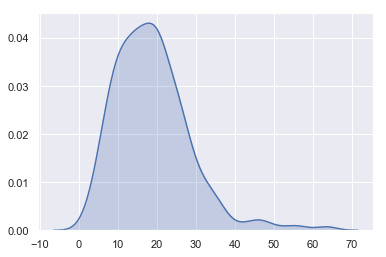

In [186]:
dist1 = compute_dist_pdf(df, 'L_CB_accpassloc')

In [187]:
(df['L_CB_accpass'].sum()/df['L_CB_pass'].sum())*100

92.84692417739629

In [191]:
c = list()
for i in range(0, len(x1)):
    if (x1[i] > 52) and (y1[i] < 34):
        c.append([x1[i], y1[i]])
(len(c)/len(x1))*100

7.550077041602465

**The percentage of final pass location in the bottom right region of the pitch (RW) is only 7% of the total final passes location. This is in congruence with the heatmap too**

# Long Distance Pass Analysis 

## RRRL - Right Footed LCB

In [40]:
a, b = dist_threshold(rrrl, 'L_CB_accpassloc', len(rrrl), 0)
x, y = dist_threshold(rrrl, 'L_CB_accpassloc', len(rrrl), 1)

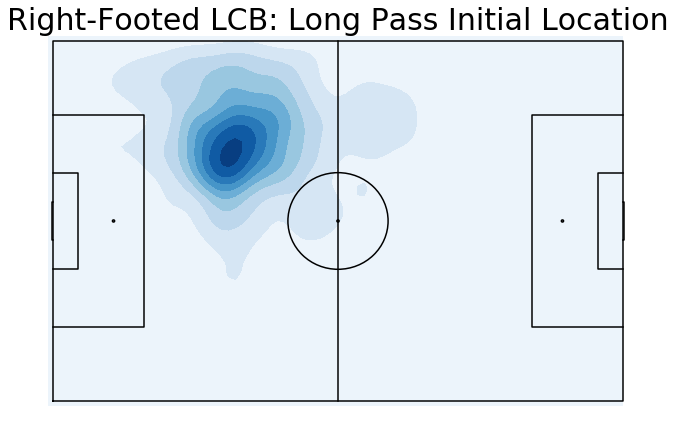

In [41]:
heatmap(a, b, 'Right-Footed LCB: Long Pass Initial Location', 'Blues')

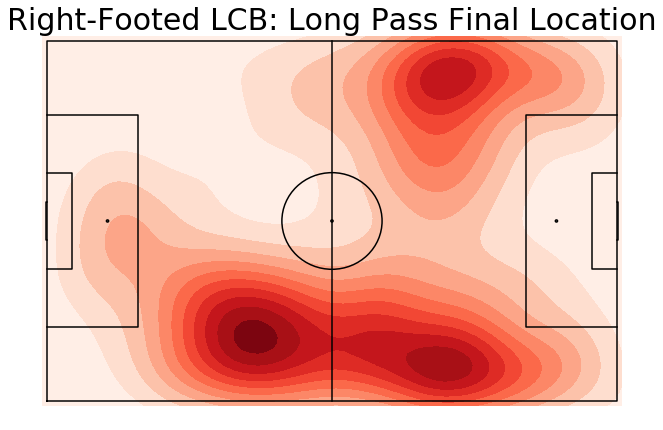

In [42]:
heatmap(x, y, 'Right-Footed LCB: Long Pass Final Location', 'Reds')

## RRLL - Left Footed LCB

In [43]:
a, b = dist_threshold(rrll, 'L_CB_accpassloc', len(rrll), 0)
x, y = dist_threshold(rrll, 'L_CB_accpassloc', len(rrll), 1)

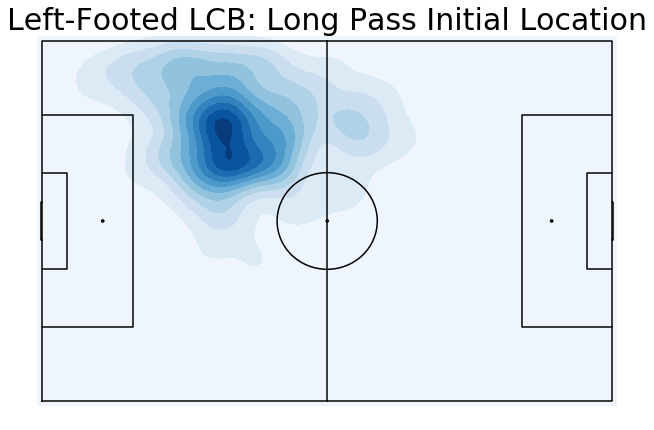

In [44]:
heatmap(a, b, 'Left-Footed LCB: Long Pass Initial Location', 'Blues')

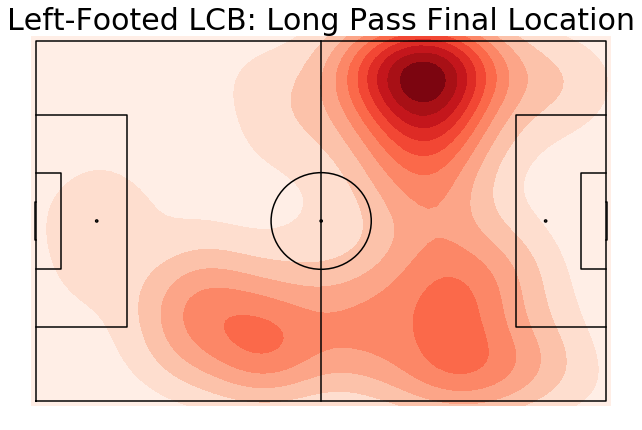

In [45]:
heatmap(x, y, 'Left-Footed LCB: Long Pass Final Location', 'Reds')

# Inferences 

1. A Right footed LCB makes more accurate passes towards:<br>
    i. LM-LB region <br>
    ii. RDM region<br>
    iii. LW region<br>
2. Out of all these passes, a Right footed LCB makes aerial accurate passes more towards:<br>
    i. Extreme Left flank (LW) region <br>
    ii. Extreme Right flank (RW) region <br>
3.  A Left footed LCB makes more passes towards:<br>
    i. LW region<br>
    ii. RDM region<br>
    iii. LM-LB region<br>
4. Out of all these passes, a Left footed LCB makes aerial passes more towards:<br>
    i. Central Left flank (LW) region <br>
    ii. Central Right flank (RW) region <br>
    iii. Central Attacking Midfield region <br>
**Note**: *The Aerial Accurate Passes of a Right footed LCB are observed to be more on either flanks and much lesser central than a Left footed LCB* <br>

Upon significant observations based on aerial passes, Long Passes (35+ mtr. Passes) were analyzed. <br>
1. A Right footed LCB makes more accurate long passes towards: <br>
    i. RB-RM region <br>
    ii. Extreme RW/ Right flank region <br>
2. A Left footed LCB makes more accurate long passes towards: <br>
    i. Central LW - Central Attacking Mid region <br>
    ii. RDM to Central RW region <br>

# Region Percentages 

Order:<br>percentage(x_rightflank_attack), percentage(x_rightflank_def), percentage(
        x_leftflank_attack), percentage(x_leftflank_def), percentage(
            x_rightcentral_attack), percentage(x_rightcentral_def), percentage(
                x_leftcentral_attack), percentage(x_leftcentral_def)

In [73]:
#RRRL
r = get_region(x, y)
print(r)
reg_rrrl = [(i/len(x))*100 for i in r]
reg_rrrl

[296, 233, 234, 37, 87, 135, 100, 38]


[25.517241379310345,
 20.086206896551726,
 20.17241379310345,
 3.189655172413793,
 7.5,
 11.637931034482758,
 8.620689655172415,
 3.2758620689655173]

In [75]:
#RRLL
r = get_region(x, y)
print(r)
reg_rrll = [(i/len(x))*100 for i in r]
reg_rrll

[114, 74, 171, 19, 75, 51, 65, 24]


[19.224283305227654,
 12.478920741989882,
 28.836424957841484,
 3.204047217537943,
 12.647554806070826,
 8.600337268128163,
 10.961214165261383,
 4.0472175379426645]

In [32]:
data_reg = [['Right Flank Attack', 25.517241379310345, 'RRRL'],
            ['Right Flank Attack',19.224283305227654, 'RRLL'],
            ['Right Flank Def', 20.086206896551726, 'RRRL'],
            ['Right Flank Def', 12.478920741989882, 'RRLL'],
            ['Left Flank Attack', 20.17241379310345, 'RRRL'],
            ['Left Flank Attack', 28.836424957841484, 'RRLL'],
            ['Left Flank Def', 3.189655172413793, 'RRRL'],
            ['Left Flank Def', 3.204047217537943, 'RRLL'],
            ['Right Central Attack', 7.5, 'RRRL'],
            ['Right Central Attack', 12.647554806070826, 'RRLL'],
            ['Right Central Def', 11.637931034482758, 'RRRL'],
            ['Right Central Def', 8.600337268128163, 'RRLL'],
            ['Left Central Attack', 8.620689655172415, 'RRRL'],
            ['Left Central Attack', 10.961214165261383, 'RRLL'],
            ['Left Central Def', 3.2758620689655173, 'RRRL'],
            ['Left Central Def', 4.0472175379426645, 'RRLL']]
reg = pd.DataFrame(data_reg, columns = ['Region', 'Accurate Long Pass %', 'Set'])
fig = px.bar(reg, x="Accurate Long Pass %", y="Region", color='Set', barmode='group', orientation='h')
fig.show()

# Test for Statistical Significance 

**Null Hypothesis:** There is no statistically significant difference between the proportion of passes made by left footed and right footed left center backs in a lineup with four defenders<br><br>
**Alternate Hypothesis:** There is a statistically significant difference between the proportion of passes made by left and right footed left center backs in a lineup with four defenders

**H0: P1 = P2** <br>
**H1: P1 != P2** <br>
*P1 - RRRL, P2 - RRLL*

## Test for Right Flank Attack Proportions

In [40]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([296, 114])
nobs = np.array([1160, 593])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)
print("C.I.:", 100-pval, '%')

2.944911194922203 0.0032304736958790816
C.I.: 99.99676952630412 %


## Test for Right Flank Def Proportions

In [41]:
count = np.array([233, 74])
nobs = np.array([1160, 593])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)
print("C.I.:", 100-pval, '%')

3.9648222148055274 7.345066986490204e-05
C.I.: 99.99992654933014 %


## Test for Left Flank Attack Proportions

In [42]:
count = np.array([234, 171])
nobs = np.array([1160, 593])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)
print("C.I.:", 100-pval, '%')

-4.071869444885173 4.663731850974719e-05
C.I.: 99.9999533626815 %


## Test for Right Central Attack Proportions

In [43]:
count = np.array([87, 75])
nobs = np.array([1160, 593])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)
print("C.I.:", 100-pval, '%')

-3.520916141520241 0.00043005859852000047
C.I.: 99.99956994140148 %


## Test for Left Central Attack Proportions

In [44]:
count = np.array([100, 65])
nobs = np.array([1160, 593])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)
print("C.I.:", 100-pval, '%')

-1.5877907649396912 0.11233366045042474
C.I.: 99.88766633954957 %


**In all the cases, the Null Hypothesis is rejected by the 2-Tail test of Z-Value for Difference between 2 proportions**

# Random Sampling Test
The dataset is sampled at 20% of the total number of entries (i.e. 64 samples for RRRL dataset and 32 samples for RRLL) and the process of computing the accurate long pass percentage across different regions is implemented. These steps are repeated for 50 times and the number of instances where percentage of accurate long passes by right footed defender at LCB position surpasses that of a left footed defender at the same position are noted.

# Rough 

In [15]:
df_kde = pd.DataFrame(columns=['x', 'y'])
df_kde['x'] = a
df_kde['y'] = b
df_kde

x      y
0     32.24  61.88
1     44.72  51.00
2     46.80  32.64
3     37.44  49.64
4     38.48  48.96
5     55.12  51.00
6     33.28  55.76
7     49.92  52.36
8     46.80  42.84
9     56.16  18.36
10    36.40  53.72
11    12.48  56.44
12    14.56  52.36
13    24.96  59.16
14    32.24  59.84
15    62.40  57.80
16    33.28  57.80
17    15.60  36.04
18    11.44  46.92
19    63.44  56.44
20    17.68  26.52
21    33.28  38.76
22    42.64  60.52
23    66.56  43.52
24    61.36  43.52
25    16.64  57.80
26    38.48  63.92
27    21.84  57.80
28    65.52  54.40
29    56.16  36.72
30    56.16  42.84
31    33.28  59.84
32    41.60  42.84
33    33.28  53.04
34    34.32  46.92
35    56.16  40.12
36    37.44  63.92
37    47.84  49.64
38    45.76  46.24
39    38.48  27.20
40    26.00   1.36
41    61.36   9.52
42    45.76  46.24
43    61.36  50.32
44    44.72  44.20
45    26.00  51.00
46    36.40  51.00
47    38.48  57.12
48    44.72  44.20
49    37.44  50.32
50    30.16  46.24
51    43.68  44.20
52    33.28  42.16
53    26.00  46.24
54     8.32  12.24
55    27.04  54.40
56    32.24  47.60
57    37.44  52.36
58    23.92  54.40
59    61.36  57.12
60    58.24  50.32
61    54.08  57.12
62    30.16  42.16
63    44.72  29.92
64    57.20  53.04
65    53.04  50.32
66    67.60  57.12
67    63.44  52.36
68    22.88  61.88
69    43.68  25.16
70    27.04  33.32
71    12.48  25.84
72    10.40  61.88
73    55.12  51.68
74    43.68  51.68
75    41.60  27.20
76    38.48  13.60
77    29.12  33.32
78    32.24  42.16
79    69.68  49.64
80    62.40  53.04
81    31.20  45.56
82    34.32  49.64
83    40.56  51.00
84    20.80  37.40
85    32.24  42.84
86    18.72  47.60
87    13.52  40.80
88    38.48  37.40
89    26.00  46.92
90    56.16  57.80
91    68.64  45.56
92    58.24  65.96
93    39.52  56.44
94    67.60  64.60
95    40.56  56.44
96    32.24  41.48
97    32.24  50.32
98    48.88  57.80
99    20.80  46.92
100   30.16  46.92
101   31.20  39.44
102   42.64  53.72
103   36.40  47.60
104   36.40  31.96
105   32.24  59.84
106   33.28  47.60
107   45.76  65.28
108   62.40  54.40
109   32.24  56.44
110   28.08  34.68
111   12.48  36.72
112   34.32  54.40
113   42.64  21.76
114   36.40  51.00
115   45.76  49.64
116   47.84  57.12
117   24.96  55.76
118   15.60  42.84
119   29.12  49.64
120   45.76  37.40
121   41.60  58.48
122   36.40  65.96
123   15.60  63.92
124    7.28  47.60
125   41.60  55.76
126   34.32  44.20
127   61.36  59.16
128   30.16  45.56
129   44.72  61.88
130   56.16  53.72
131   20.80  60.52
132   49.92  53.72
133   60.32  48.28
134   33.28  64.60
135   41.60  57.12
136   36.40  18.36
137   30.16  44.88
138   32.24  41.48
139   31.20  40.12
140   31.20  32.64
141   37.44  46.92
142   19.76  64.60
143   32.24  43.52
144   18.72  34.68
145   43.68  43.52
146   42.64  65.96
147   14.56  61.20
148   35.36  42.84
149   11.44  48.28
150   31.20  42.84
151   26.00  42.16
152   45.76  46.92
153   27.04  40.80
154   43.68  51.00
155   28.08  42.84
156   11.44   8.16
157   27.04  36.72
158   50.96  44.88
159   42.64  40.80
160   47.84  51.00
161   27.04  46.24
162    4.16  59.84
163   29.12  42.84
164   12.48  60.52
165   31.20  50.32
166   26.00  23.12
167   29.12  41.48
168   31.20  46.24
169   62.40  54.40
170   33.28  23.12
171   47.84  36.04
172   32.24  48.96
173   11.44  57.12
174   17.68  57.80
175   39.52  53.72
176   61.36  59.84
177   30.16  30.60
178   46.80  56.44
179   40.56  59.84
180   15.60  54.40
181   32.24  40.80
182   34.32  65.96
183   44.72  65.96
184   50.96  29.24
185   19.76  47.60
186   29.12  42.16
187   28.08  43.52
188   26.00  51.68
189   29.12  49.64
190   34.32  58.48
191   37.44  65.28
192   22.88  47.60
193   30.16  63.24
194   29.12  45.56
195   38.48  32.64
196   29.12  38.76
197   38.48  31.96
198   71.76  51.68
199   32.24  55.08
200   29.12  51.68
201   38.48  48.28
202   33.28  21.08
203   40.56  43.52
204   58.24  65.96
205   36.40  45.56
206   30.16  46.24
207   27.04  51.68
208   38.48  42.16
209   26.00  64.60
2

In [16]:
df_kde.values.T

array([[32.24, 44.72, 46.8 , ..., 22.88, 33.28, 24.96],
       [61.88, 51.  , 32.64, ..., 63.24, 44.88, 53.04]])

In [17]:
kde = sps.gaussian_kde(df_kde.values.T)

In [19]:
xx, yy = np.meshgrid(
    np.linspace(0, 104, 500),
    np.linspace(0, 68, 500))

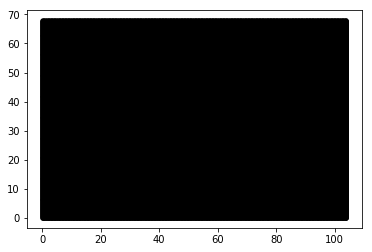

In [30]:
plt.plot(xx, yy, marker='.', color='k', linestyle='none')
plt.show()

In [31]:
xx.ravel()

array([  0.        ,   0.20841683,   0.41683367, ..., 103.58316633,
       103.79158317, 104.        ])

In [20]:
z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [21]:
zi = z > np.max(z) * 0.3

In [22]:
# print some summaries
print('x = (%.1f, %.1f)' % (min(xx[zi]), max(xx[zi])))
print('y = (%.1f, %.1f)' % (min(yy[zi]), max(yy[zi])))
print('area = %.1f' % (130 * 70 * np.mean(zi)))

x = (20.6, 48.6)
y = (34.2, 64.7)
area = 847.2


In [28]:
x1, y1 = est_dense_reg(a, b, 3)
print(x1, y1)

[16.673346693386772, 58.148296593186366] [35.83967935871743, 66.36472945891784]
